
# Análisis descriptivo, tratamiento de valores faltantes y variables categóricas


## Importar datos

Cargamos las librerías necesarias.
- `pandas` y `numpy` para manipulación de datos,
- `matplotlib` para visualizaciones,
- `sklearn` para imputación y One-Hot Encoding.


In [57]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer



## 1) Carga del CSV (`datos.csv` con separador `;`)


In [58]:
df = pd.read_csv("/student_exam_scores.csv")
df


,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0



## 2) Inspección inicial

Preguntas guía:
- ¿Cuántas observaciones y variables hay?
- ¿Qué tipos de datos tenemos (numéricos, cadenas/objetos, fechas)?
- ¿Hay columnas con un único valor o muchas categorías?


In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/archive/student_exam_scores.csv")

In [61]:

print("Dimensiones:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)

print("\nPrimeras filas:")
display(df.head())

print("\nValores únicos aproximados por columna (hasta 20 ejemplos):")
for col in df.columns:
    uniq = df[col].unique()
    print(f"- {col}: {len(uniq)} únicos. Valores:", uniq[:20])


Dimensiones: (200, 6)

Tipos de datos:
student_id             object
hours_studied         float64
sleep_hours           float64
attendance_percent    float64
previous_scores         int64
exam_score            float64
dtype: object

Primeras filas:


,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3



Valores únicos aproximados por columna (hasta 20 ejemplos):
- student_id: 200 únicos. Valores: ['S001' 'S002' 'S003' 'S004' 'S005' 'S006' 'S007' 'S008' 'S009' 'S010'
 'S011' 'S012' 'S013' 'S014' 'S015' 'S016' 'S017' 'S018' 'S019' 'S020']
- hours_studied: 96 únicos. Valores: [ 8.   1.3  4.   3.5  9.1  8.4 10.8  2.   5.6  3.4  6.6  3.2  8.1  7.
  7.5  9.9  1.1  8.7  4.7  2.7]
- sleep_hours: 50 únicos. Valores: [8.8 8.6 8.2 4.8 6.4 5.1 6.  4.3 5.9 8.9 5.3 7.9 6.3 6.1 9.  6.8 7.6 5.5
 6.9 6.7]
- attendance_percent: 167 únicos. Valores: [72.1 60.7 73.7 95.1 89.8 58.5 54.2 75.8 81.6 66.8 90.9 87.6 83.6 61.2
 60.  51.2 62.2 73.8 92.5 53.6]
- previous_scores: 54 únicos. Valores: [45 55 86 66 71 75 88 84 70 81 85 68 90 41 58 54 65 59 82 77]
- exam_score: 139 únicos. Valores: [30.2 25.  35.8 34.  40.3 35.7 37.9 18.3 34.7 24.7 29.3 35.1 31.2 41.1
 34.1 28.9 36.3 35.6 17.1 46. ]



## 3) Análisis descriptivo

- Estadísticos básicos para variables **numéricas** con `describe()`.
- Resumen de frecuencias para variables **categóricas** (tipo `object`/`category`).

> Nota: Si tienes valores numéricos almacenados como texto con comas/puntos, considera convertirlos previamente.


In [62]:

print("Estadísticos descriptivos (numéricos):")
display(df.select_dtypes(include=[np.number]).describe().T)

print("\nFrecuencias de las 10 categorías más comunes por columna categórica:")
cat_cols_raw = df.select_dtypes(include=['object','category']).columns.tolist()
for col in cat_cols_raw:
    print(f"\nColumna: {col}")
    display(df[col].value_counts(dropna=False).head(10))


Estadísticos descriptivos (numéricos):


,count,mean,std,min,25%,50%,75%,max
hours_studied,200.0,6.3255,3.227317,1.0,3.5,6.15,9.000,12.0
sleep_hours,200.0,6.6220,1.497138,4.0,5.3,6.70,8.025,9.0
attendance_percent,200.0,74.8300,14.249905,50.3,62.2,75.25,87.425,100.0
previous_scores,200.0,66.8000,15.663869,40.0,54.0,67.50,80.000,95.0
exam_score,200.0,33.9550,6.789548,17.1,29.5,34.05,38.750,51.3



Frecuencias de las 10 categorías más comunes por columna categórica:

Columna: student_id


,count
student_id,
S001,1
S002,1
S003,1
S004,1
S005,1
S006,1
S007,1
S008,1
S009,1



### Visualizaciones rápidas

Reglas:
- Usamos `matplotlib`.
- **Una gráfica por celda**.
- **Sin estilos ni colores específicos**.

1. Histograma de la **primera columna numérica**.


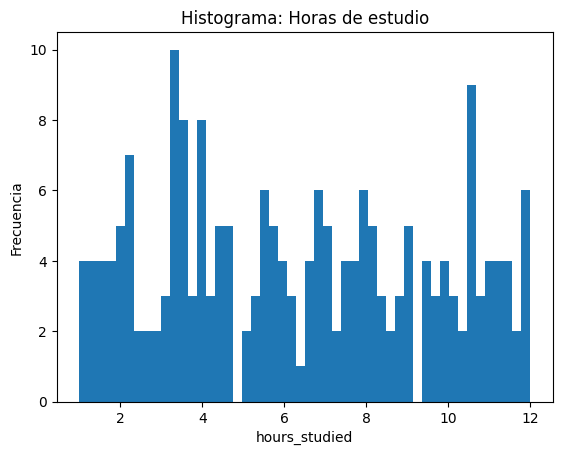

In [63]:

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure()
#df[num_cols[0]].plot(kind='hist', bins=50, title=f'Histograma: {num_cols[0]}',density=True)
df["hours_studied"].plot(kind='hist', bins=50, title=f'Histograma: {"Horas de estudio"}')
plt.xlabel(num_cols[0])
plt.ylabel('Frecuencia')
plt.show()




2. Boxplot de la **segunda columna numérica** (si existe).


<Figure size 640x480 with 0 Axes>

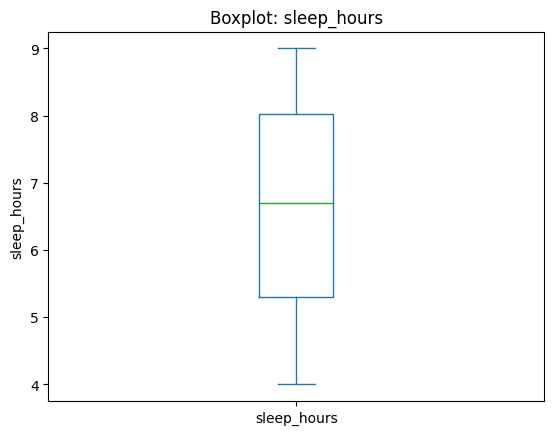

In [64]:

plt.figure()
df[[num_cols[1]]].plot(kind='box', title=f'Boxplot: {num_cols[1]}')
plt.ylabel(num_cols[1])
plt.show()



## 4) Detección de valores faltantes

Aquí calculamos el conteo de `NaN` por columna y el porcentaje de faltantes.


In [65]:

na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (df.isna().mean()*100).sort_values(ascending=False)

print("Top columnas con más faltantes:")
display(pd.DataFrame({'faltantes': na_counts, 'porcentaje': na_pct}).head(20))


Top columnas con más faltantes:


,faltantes,porcentaje
student_id,0,0.0
hours_studied,0,0.0
sleep_hours,0,0.0
attendance_percent,0,0.0
previous_scores,0,0.0
exam_score,0,0.0



## 5) Imputación de valores faltantes

Estrategia simple (puedes ajustarla):
- Para **numéricos**: imputar con **mediana** (más robusta a outliers que la media).
- Para **categóricos**: imputar con **moda** (valor más frecuente).


In [66]:

df_impute = df.copy()

num_cols = df_impute.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_impute.select_dtypes(include=['object','category']).columns.tolist()

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

if num_cols:
    df_impute[num_cols] = num_imputer.fit_transform(df_impute[num_cols])
if cat_cols:
    df_impute[cat_cols] = cat_imputer.fit_transform(df_impute[cat_cols])

print("Comprobación de faltantes tras imputación:")
display(df_impute.isna().sum().sort_values(ascending=False).head(10))


Comprobación de faltantes tras imputación:


,0
student_id,0
hours_studied,0
sleep_hours,0
attendance_percent,0
previous_scores,0
exam_score,0



## 6) Variables dummies

Dos caminos:
1. **`pandas.get_dummies`** (rápido) con `drop_first=True` para evitar colinealidad perfecta.  
2. **`sklearn.OneHotEncoder`** dentro de un `Pipeline` + `ColumnTransformer` (útil para modelado).

Primero, normalizamos tipos categóricos a `category`.


In [67]:

df_feat = df_impute.copy()

# Asegurar tipo categórico
for c in cat_cols:
    df_feat[c] = df_feat[c].astype('category')

# 6.1 Dummies con pandas
df_dummies_pd = pd.get_dummies(df_feat, columns=cat_cols, drop_first=True)
print("Columnas añadidas (muestra) con get_dummies:")
display([c for c in df_dummies_pd.columns if any(c.startswith(col+'_') for col in cat_cols)][:20])
display(df_dummies_pd.head())


Columnas añadidas (muestra) con get_dummies:


['student_id_S002',
 'student_id_S003',
 'student_id_S004',
 'student_id_S005',
 'student_id_S006',
 'student_id_S007',
 'student_id_S008',
 'student_id_S009',
 'student_id_S010',
 'student_id_S011',
 'student_id_S012',
 'student_id_S013',
 'student_id_S014',
 'student_id_S015',
 'student_id_S016',
 'student_id_S017',
 'student_id_S018',
 'student_id_S019',
 'student_id_S020',
 'student_id_S021']

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score,student_id_S002,student_id_S003,student_id_S004,student_id_S005,student_id_S006,...,student_id_S191,student_id_S192,student_id_S193,student_id_S194,student_id_S195,student_id_S196,student_id_S197,student_id_S198,student_id_S199,student_id_S200
0,8.0,8.8,72.1,45.0,30.2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.3,8.6,60.7,55.0,25.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.0,8.2,73.7,86.0,35.8,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.5,4.8,95.1,66.0,34.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9.1,6.4,89.8,71.0,40.3,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False



## 7) Exportación del dataset limpio

Guardamos dos versiones:
- `datos_limpios.csv` a partir de **get_dummies (pandas)**.


In [69]:

df_dummies_pd.to_csv("/datos_limpios.csv", index=False)
